# Aim
The aim is to test pytesseract on all image formats

Original, Gray, Binary, Inverted Binary

Since some binary images have white text, and some have black. So we ned to formalize it to single format.

The aim is to convert ALL binary images into Black text on White backgrounds,a dn then test pytesseract on them 

In [1]:
import cv2
import pytesseract
import numpy
import matplotlib.pyplot as plt
import glob

import math
from termcolor import colored

from OCR_codes import get_image_formats, get_image_formats

tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"


In [2]:
img_folder_path = ('../plate_samples_256_64/*.jpg')
#img_folder_path = ('../../TSK_00_MSC/wt2-body-tracker/output/Dash_cam_4/det_LpImg_crops/*.jpg')

fnames = glob.glob(img_folder_path)
fnames.sort()
print(len(fnames))

16


In [3]:
image_types = ['original','gray','binary','binary_inverted','binary_black_on_white', 'binary_white_on_black']

def test_all_formats(test_image):

    plt.figure(figsize=(30,10))
    
    all_image_formats = get_image_formats(test_image.astype(numpy.uint8)/255)
    
    for type_cnt, img_type in enumerate(image_types):
        inimg =  all_image_formats[type_cnt]        
        final_string = resized_image_string = pytesseract.image_to_string(inimg, config=tess_config, lang="eng")        
        
        plt.subplot(1,len(image_types), type_cnt+1)
        plt.imshow(inimg, cmap = "gray")
        #print(colored(f'Original img pred string : {test_image_string}','red'))
        plt.title(final_string, fontsize = 20)
    
    plt.show() 
    

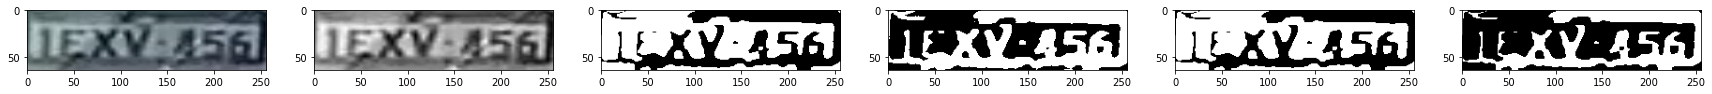

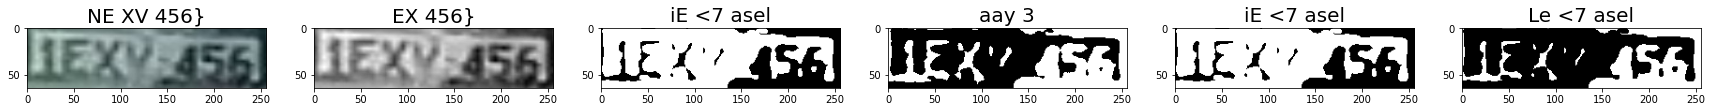

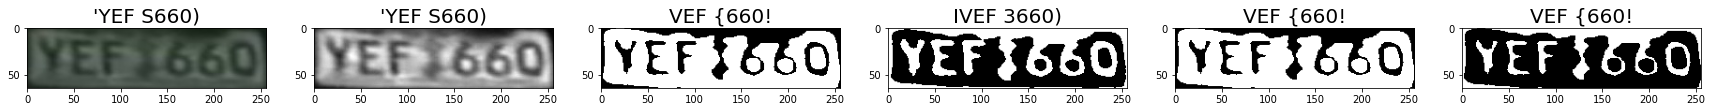

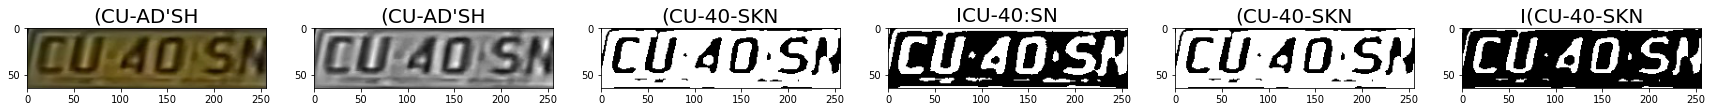

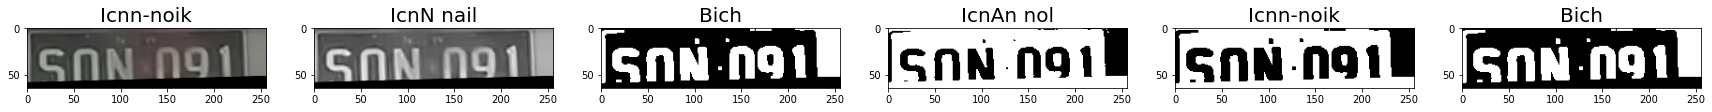

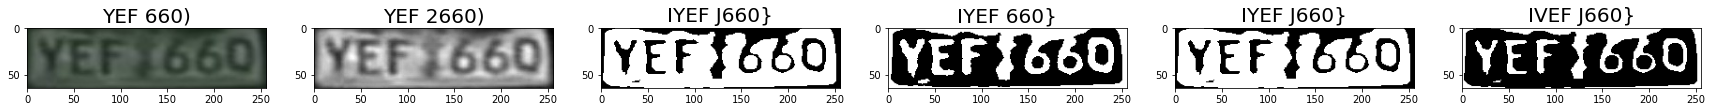

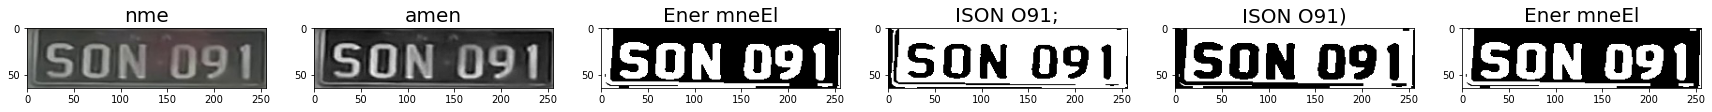

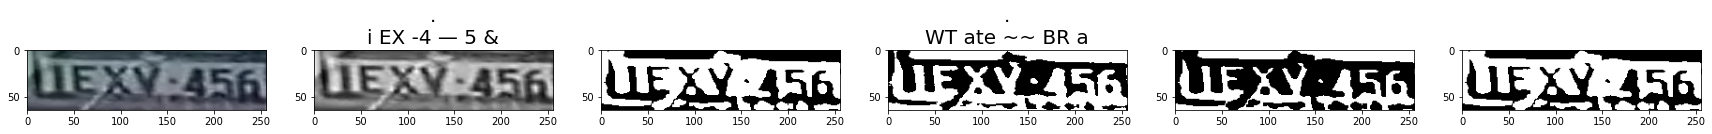

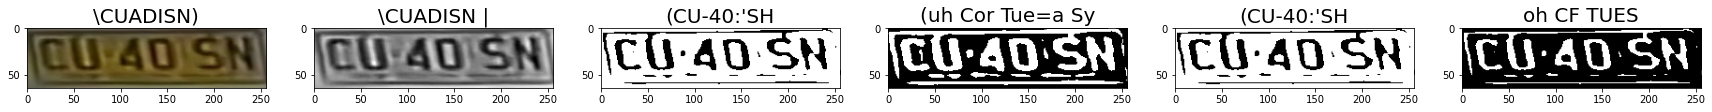

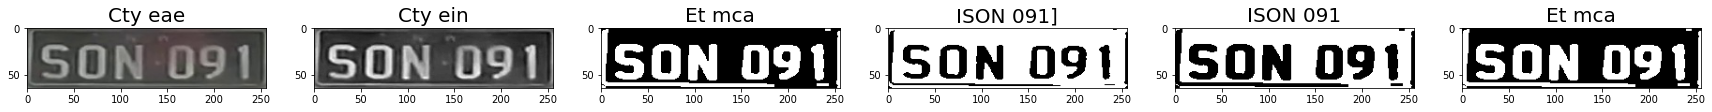

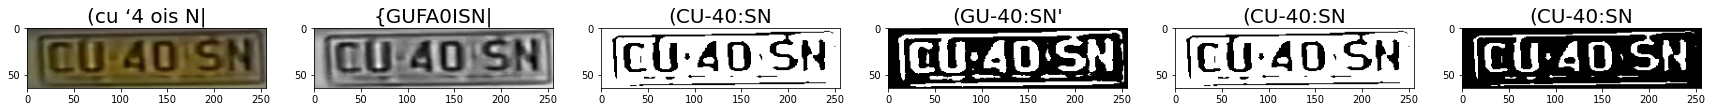

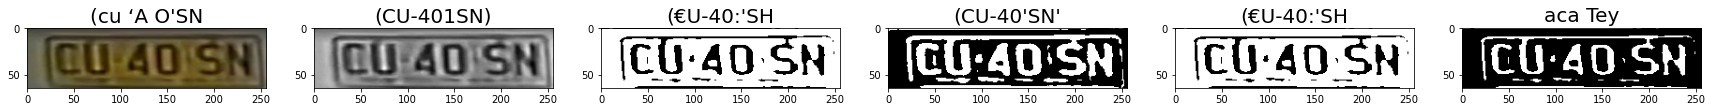

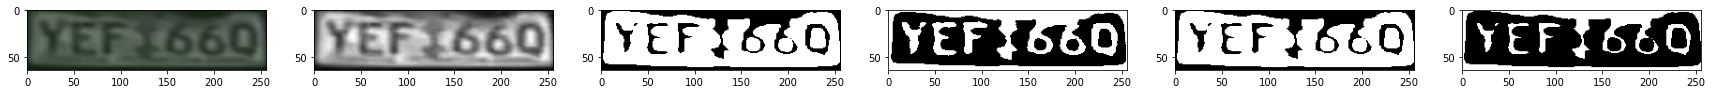

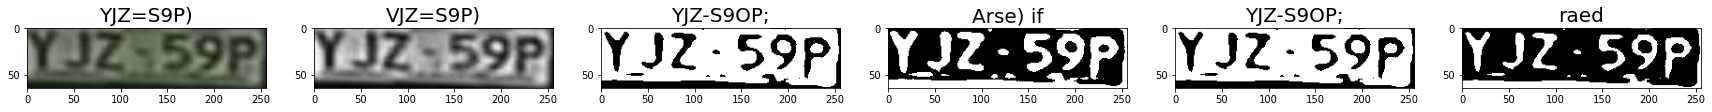

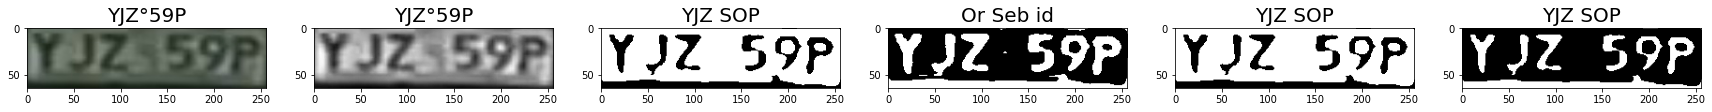

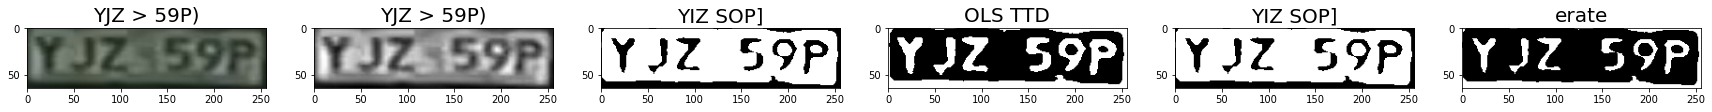

In [4]:
for img_path in fnames:
    test_image = plt.imread(img_path)
    test_all_formats(test_image)
    #print('********************************************************************************************')

In [7]:
#from PIL import Image
#import numpy
#import cv2

def duplicate_plate_images(resized_norm_test_image):
    duplicate_plate_norm_img = numpy.zeros((256,256,3))
    duplicate_plate_norm_img[0:64,:,:] = resized_norm_test_image[:,:,:]
    duplicate_plate_norm_img[64:128,:,:] = resized_norm_test_image[:,:,:]
    duplicate_plate_norm_img[128:192,:,:] = resized_norm_test_image[:,:,:]
    duplicate_plate_norm_img[192:256,:,:] = resized_norm_test_image[:,:,:]            
    
    #plt.figure()
    #plt.imshow(duplicate_plate_norm_img/255)
    #plt.show()
    
    return duplicate_plate_norm_img

image_types = ['original','gray','binary','binary_inverted','binary_black_on_white', 'binary_white_on_black']

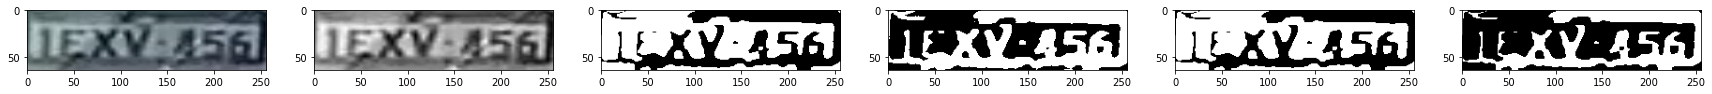

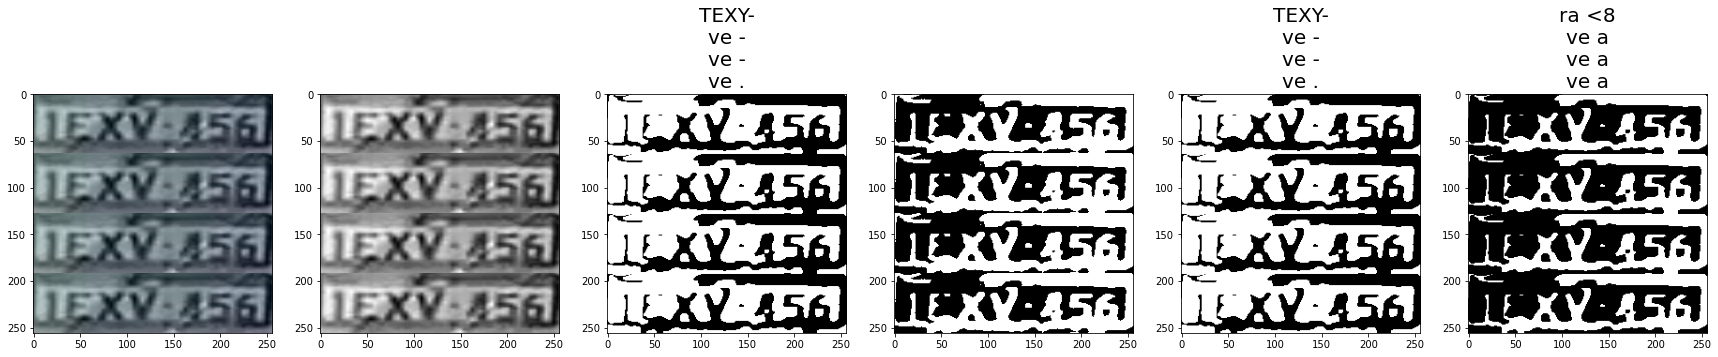

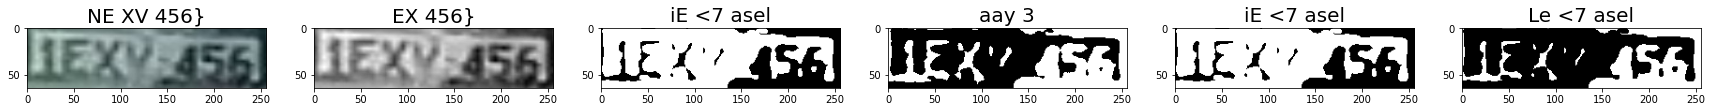

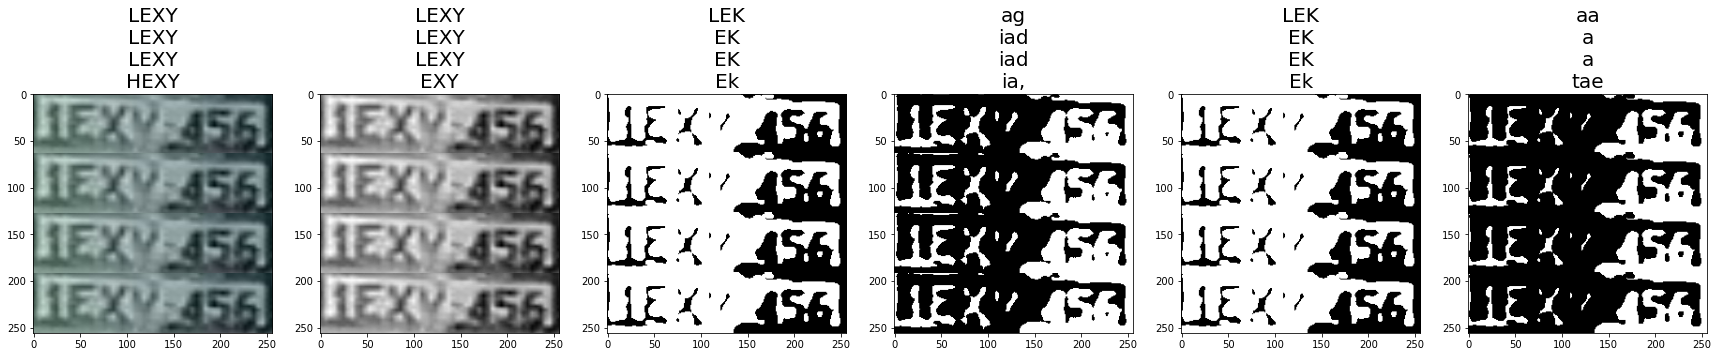

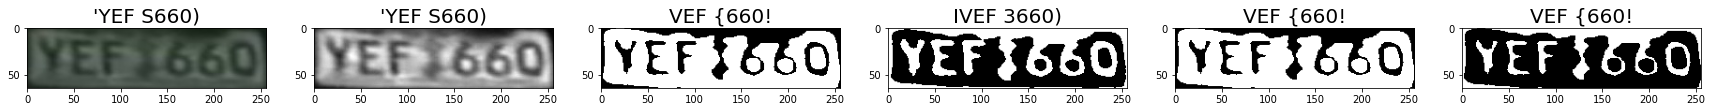

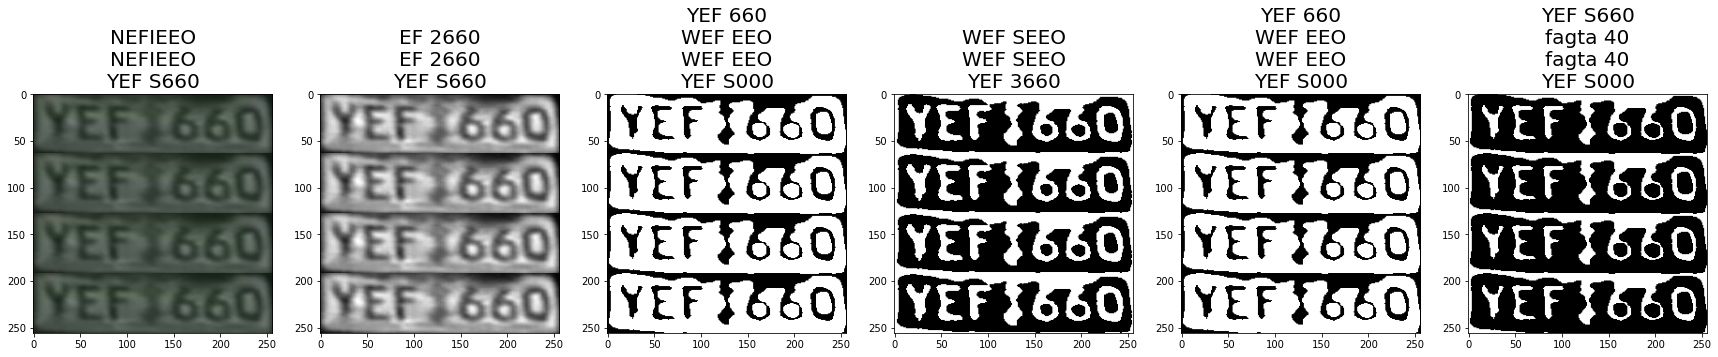

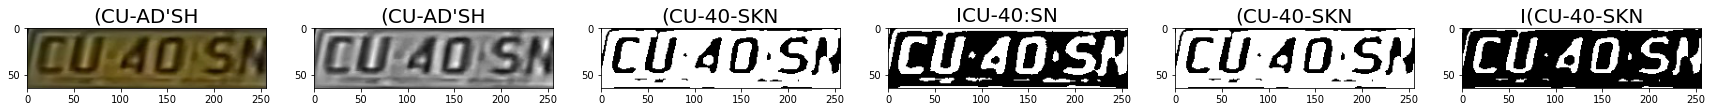

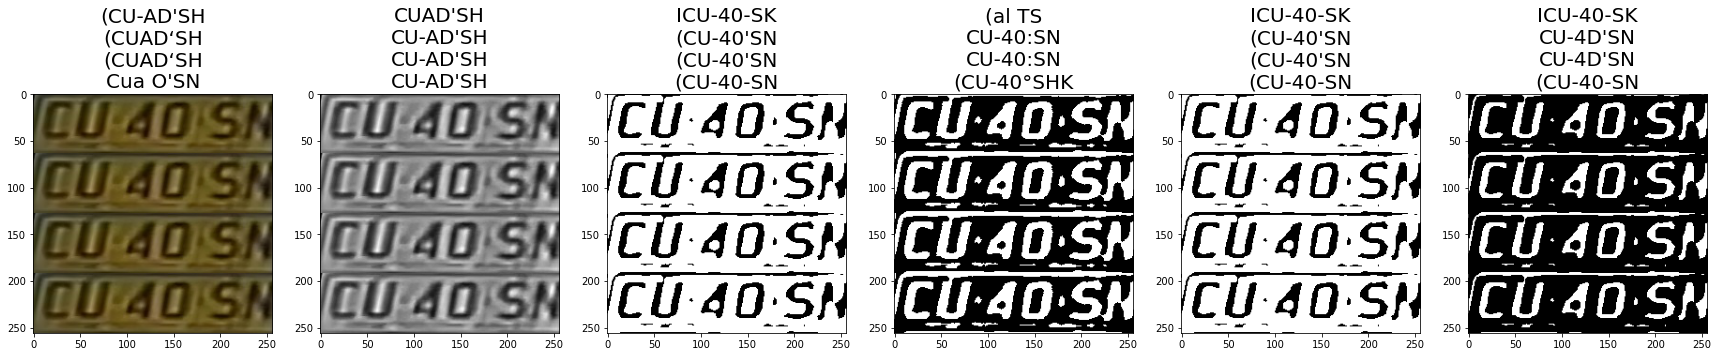

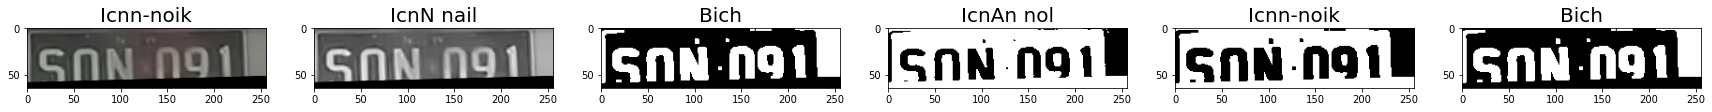

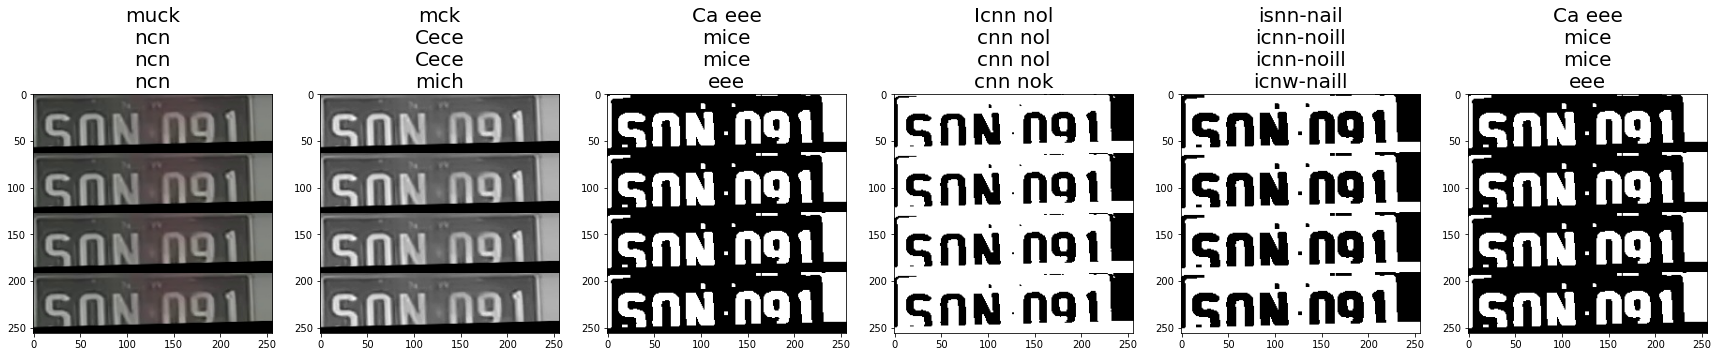

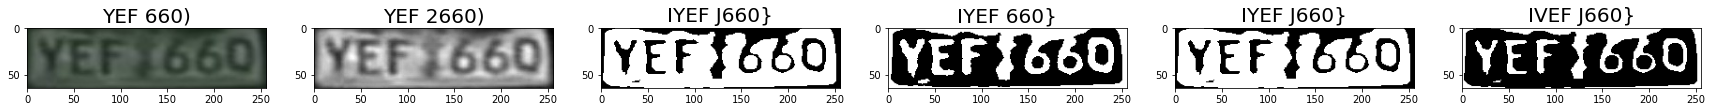

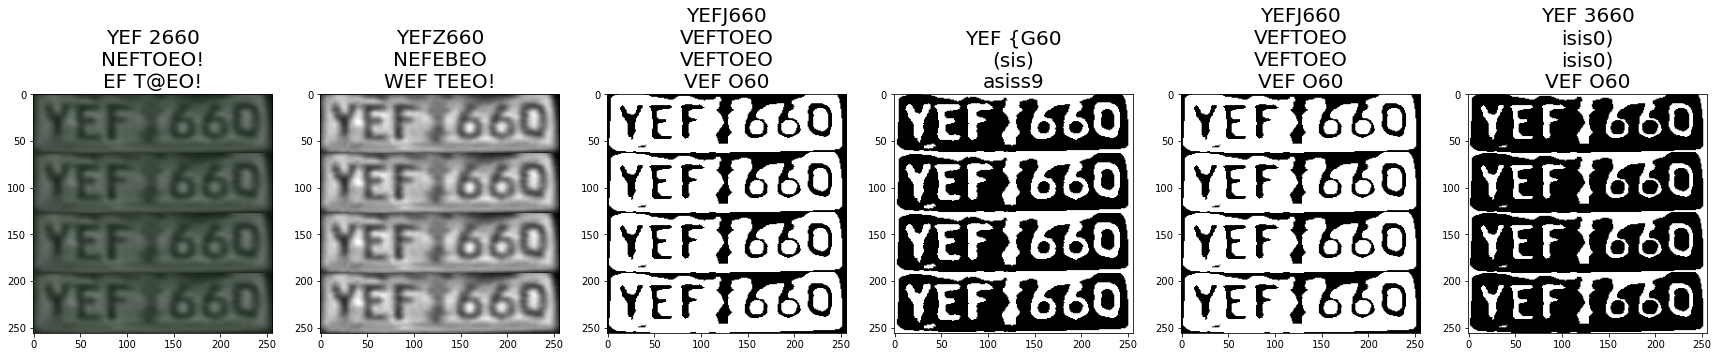

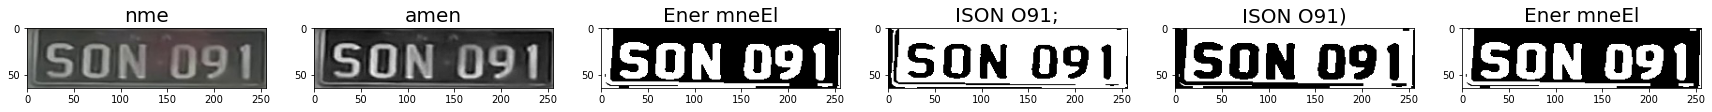

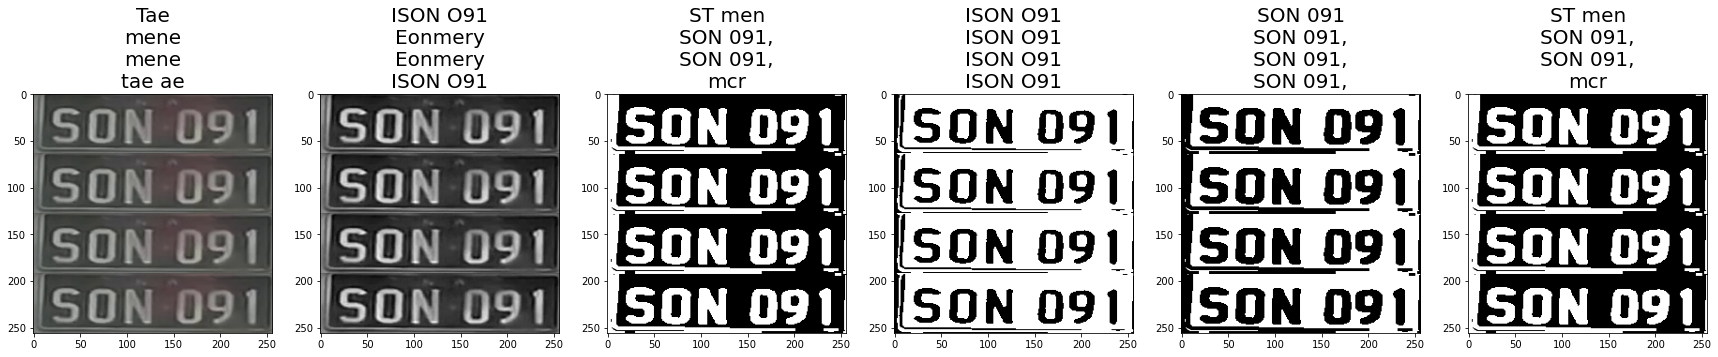

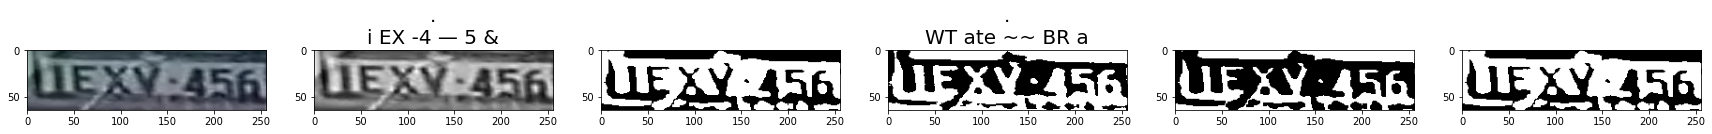

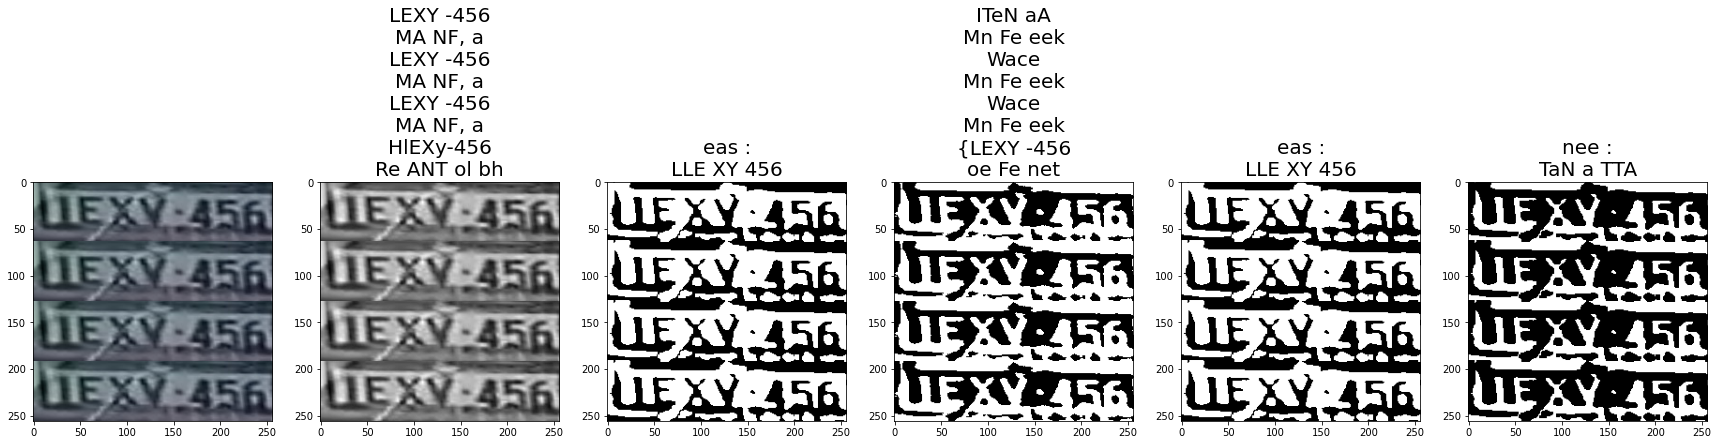

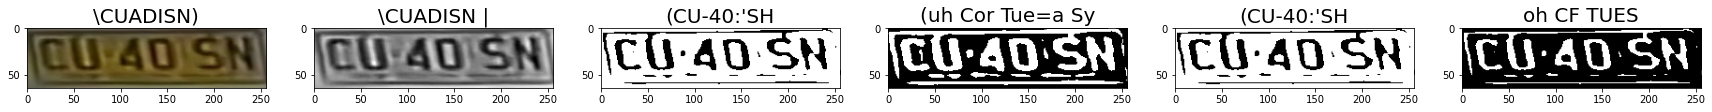

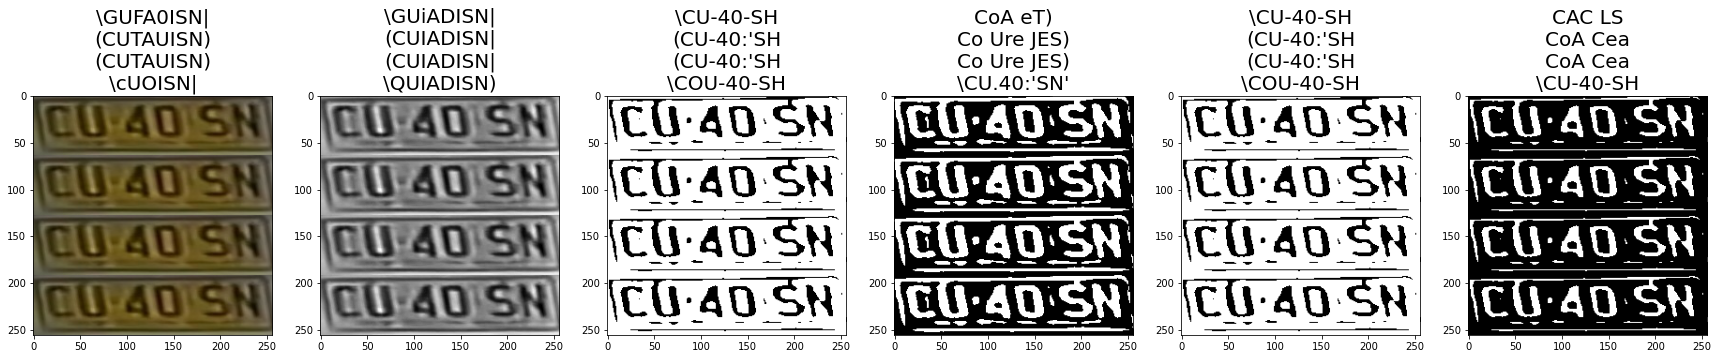

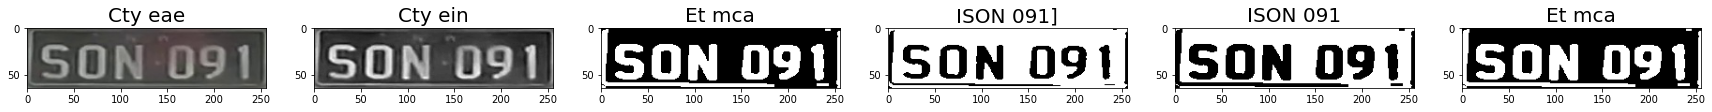

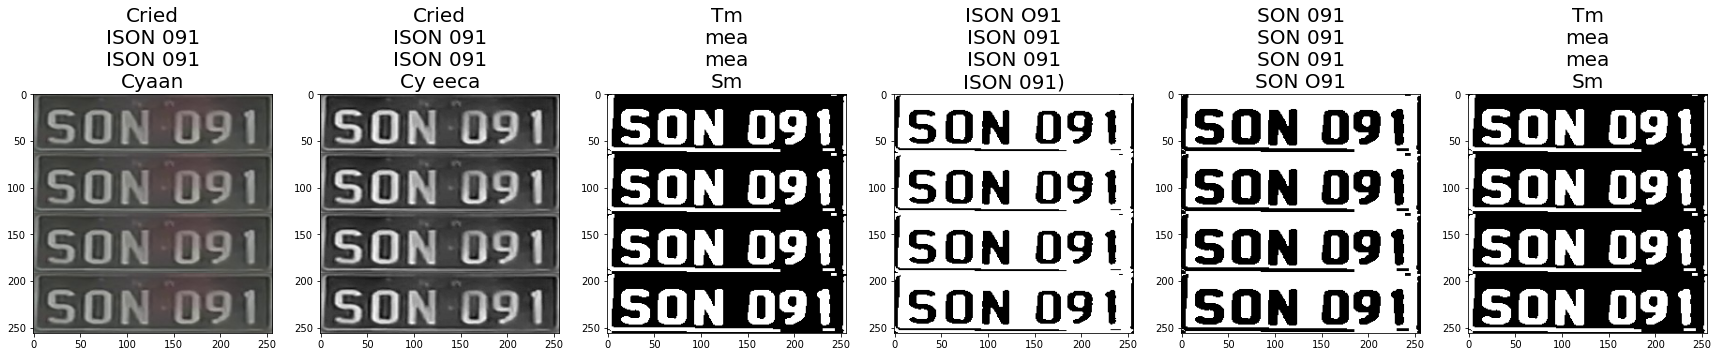

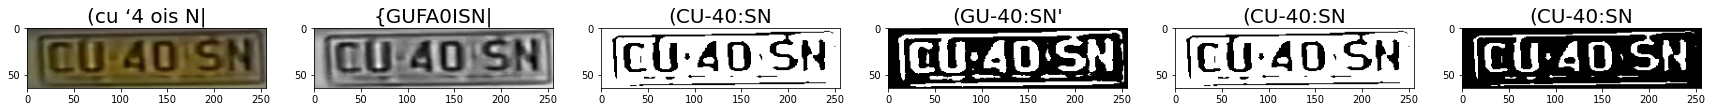

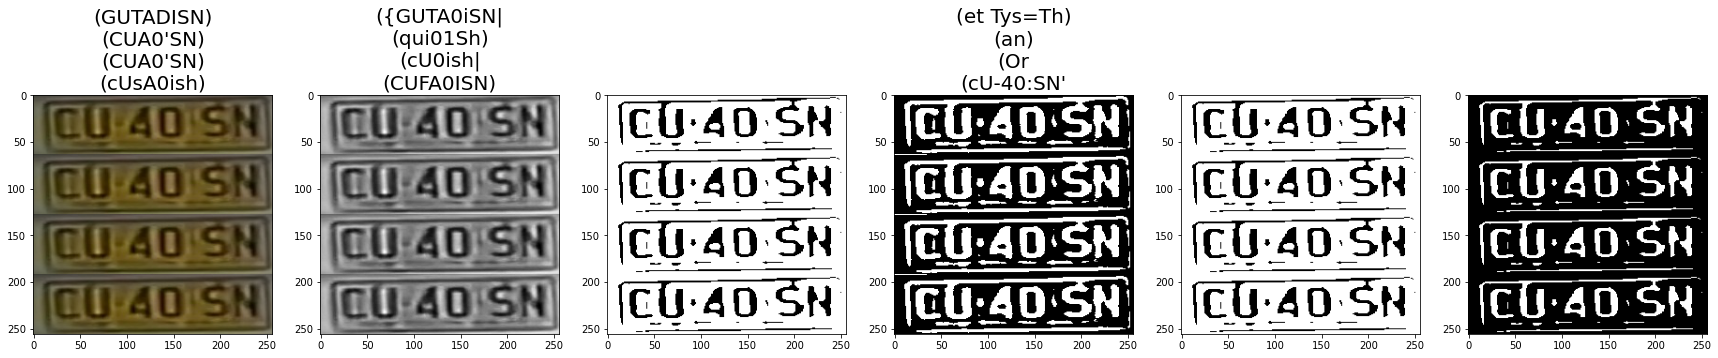

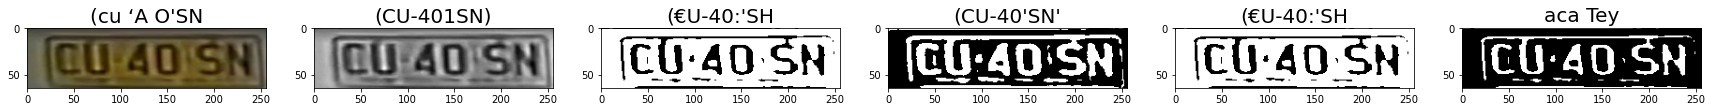

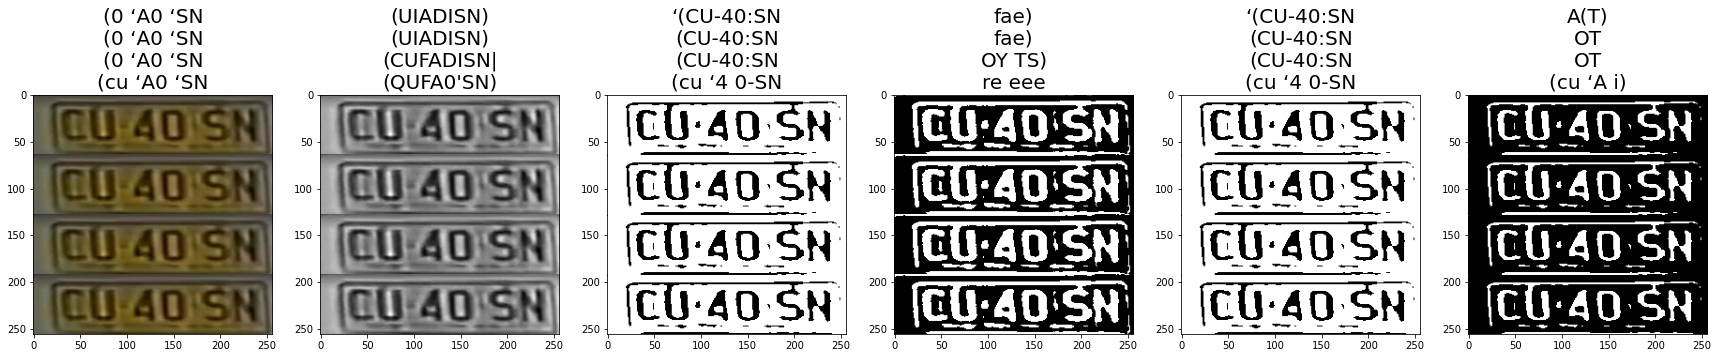

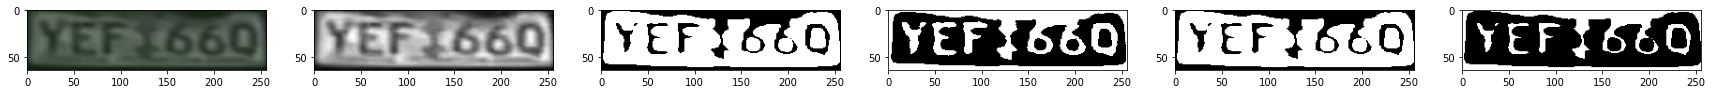

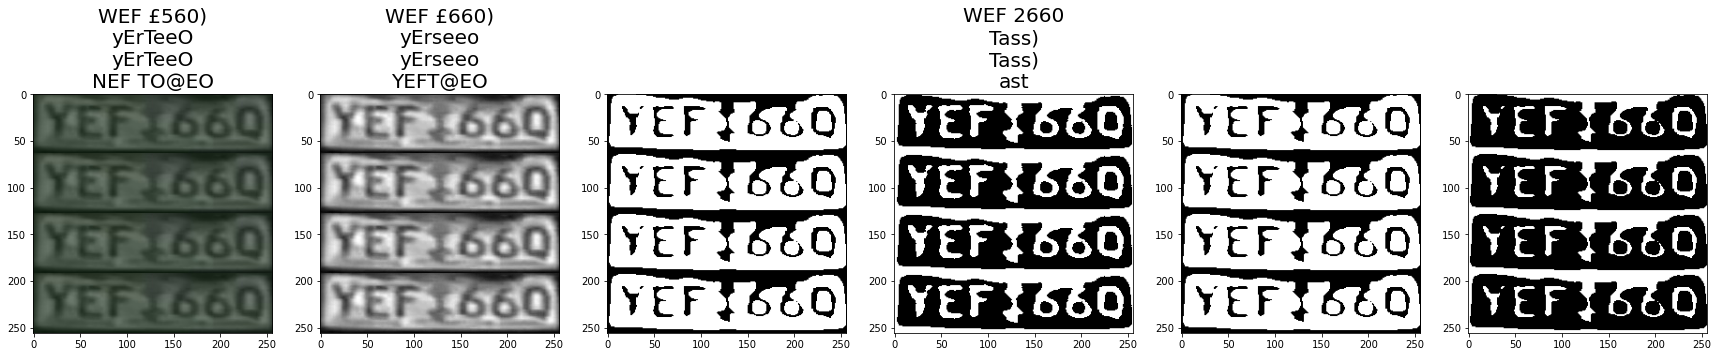

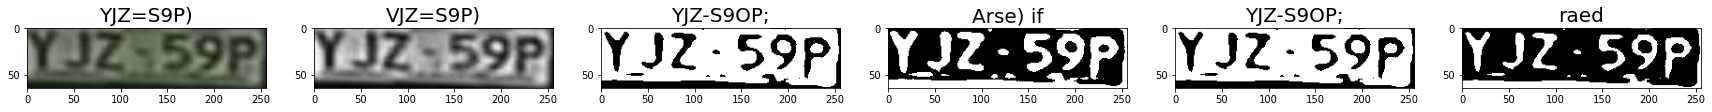

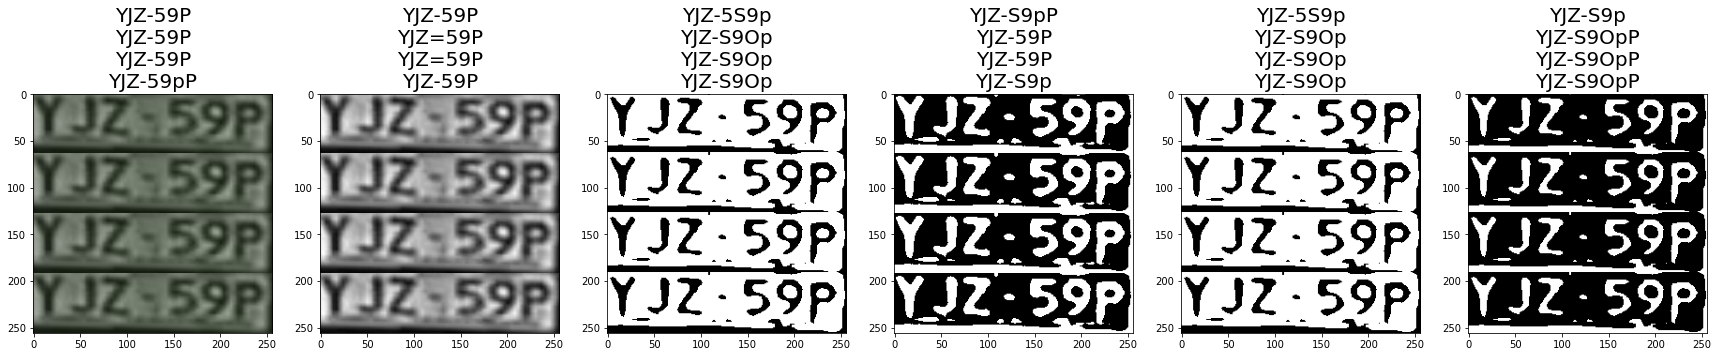

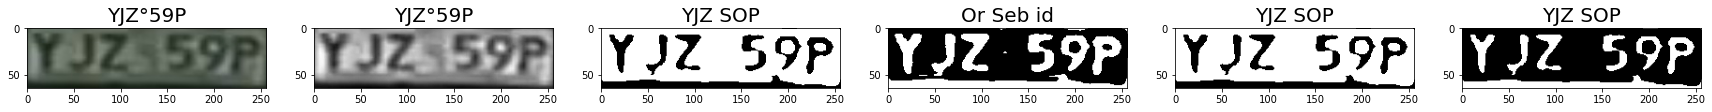

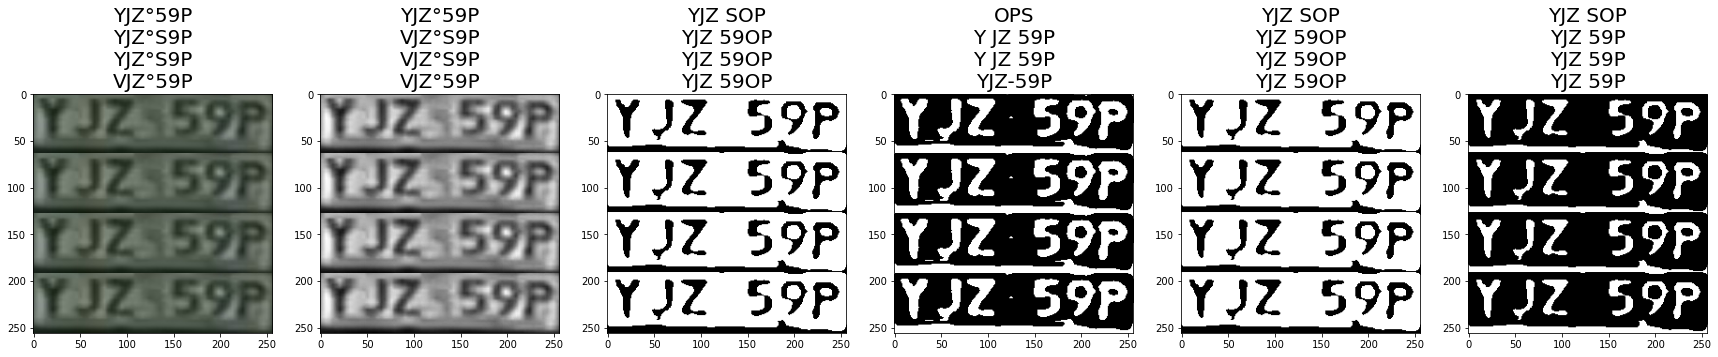

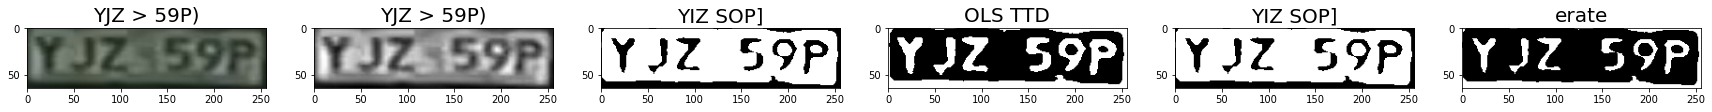

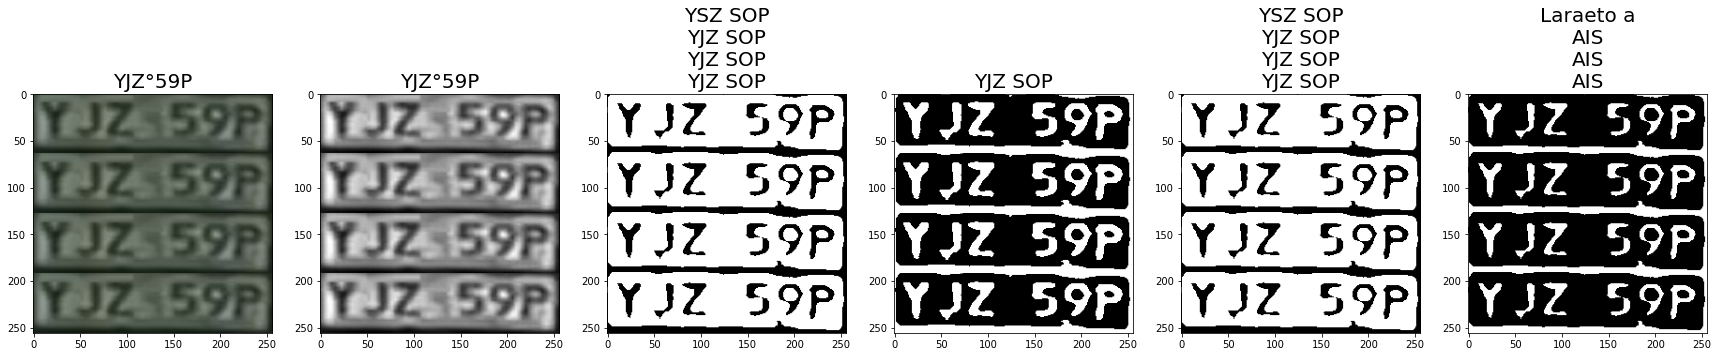

In [9]:
for img_path in fnames:
    test_image = plt.imread(img_path)
    
    test_all_formats(test_image)
    
    test_image = duplicate_plate_images(test_image)
    
    test_all_formats(test_image)

# Observations

1) Similarly looking plates may have different performance